In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from mlxtend.plotting import heatmap
import seaborn as sns

In [30]:
acc = pd.read_csv('data\사고누적지사고지표.csv', encoding = 'cp949')
acc

,지역,지점명,발생 건수,사망 건수,통합 지수
0,강남구,신사역 오거리,28,0,7.513
1,강남구,학동사거리,25,0,6.773
2,강남구,영동대교 남단 삼거리,22,3,7.093
3,강남구,강남역 사거리,25,0,6.933
4,강남구,수서역사거리,22,1,5.973
...,...,...,...,...,...
695,중랑구,중랑초 부근 사거리,11,0,2.767
696,중랑구,중화역 삼거리(4번출구),10,0,2.993
697,중랑구,면목역(2번출구),10,0,2.453
698,중랑구,중랑역 부근(남쪽),10,0,3.073


In [31]:
acc.sort_values(by='통합 지수', ascending=False).head(10)

,지역,지점명,발생 건수,사망 건수,통합 지수
527,영등포구,영등포로타리(영등포2치안센터),33,1,9.380
258,도봉구,정의여중입구교차로,27,1,8.580
312,동작구,대림사거리(성원상떼빌 북서),31,0,8.513
528,영등포구,대림사거리(대림우체국 남동),31,0,8.513
474,송파구,송파세무서 앞 오거리,30,0,8.440
630,중구,서울역 앞 사거리,30,2,8.420
602,종로구,신설동역사거리(동대문우체국),31,0,8.313
68,강동구,길동 사거리(휴다임타워),29,0,8.107
69,강동구,천호사거리(천호역 앞),26,0,8.087
98,강북구,수유사거리(대한병원),22,0,8.013


In [87]:
acc_loc = pd.pivot_table(df, index=['지역'], aggfunc=np.sum)
acc_loc.head()

,발생 건수,사망 건수,통합 지수
지역,,,
강남구,961,19,266.630
강동구,386,8,105.328
강북구,341,8,92.926
강서구,336,10,94.939
관악구,427,8,113.995


In [34]:
acc_loc['발생 건수'].sort_values(ascending=False).head()

지역
강남구     961
송파구     612
영등포구    576
동대문구    548
중구      529
Name: 발생 건수, dtype: int64

In [35]:
acc_loc['통합 지수'].sort_values(ascending=False).head()

지역
강남구     266.630
송파구     168.919
영등포구    158.137
동대문구    145.405
중구      142.052
Name: 통합 지수, dtype: float64

In [9]:
font_path = 'C:/windows/fonts/gulim.ttc'
fontprop = fm.FontProperties(fname=font_path, size=20).get_name()
rc('font', family=fontprop)

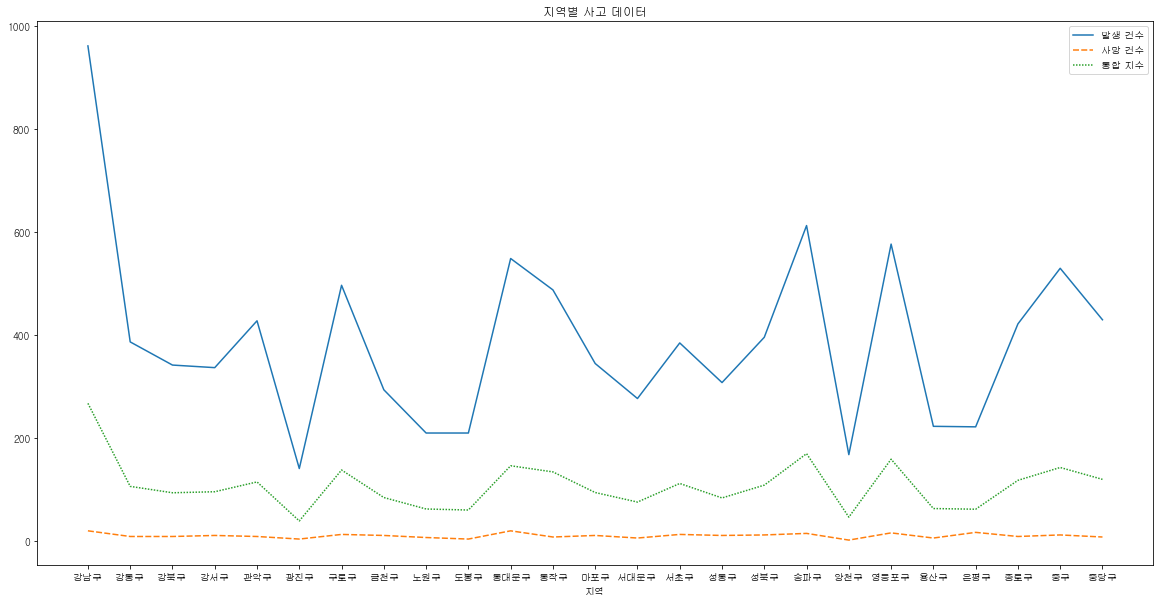

In [90]:
plt.figure(figsize=(20,10))
sns.lineplot(data=acc_loc)
plt.title('지역별 사고 데이터')
plt.show()

In [ ]:
#지역별 사고 발생 건수가 서울시 자동차량 혹은 유동인구, 인구밀도와 관련이 있을까?

In [86]:
Seoul_pop = pd.read_csv('data\서울시 인구밀도(2020).csv', encoding = 'UTF8')
Seoul_pop.head()

,자치구,동,인구,면적,인구밀도
0,종로구,소계,158996,23.91,6649
1,종로구,사직동,9806,1.23,7972
2,종로구,삼청동,2909,1.49,1952
3,종로구,부암동,10333,2.27,4552
4,종로구,평창동,18582,8.87,2095


In [84]:
pop = pd.pivot_table(Seoul_pop, index=['자치구'], aggfunc=np.sum)
pop = pop.reindex(columns=['인구', '면적', '인구밀도'])
pop.head()

,인구,면적,인구밀도
자치구,,,
강남구,1088110.0,79.01,380671.0
강동구,927996.0,49.17,437739.0
강북구,623138.0,47.20,336711.0
강서구,1171802.0,82.88,546771.0
관악구,1019606.0,59.14,633124.0


Text(0.5, 1.0, '서울시 인구밀도')

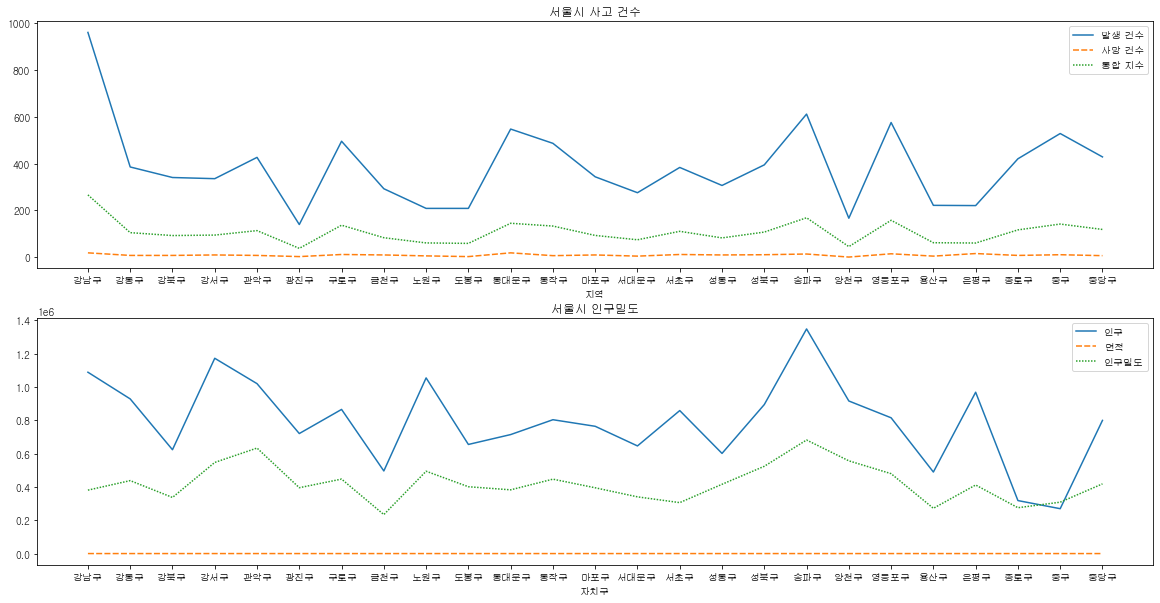

In [83]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20, 10)

sns.lineplot(data=acc_loc, ax=ax1)
ax1.set_title('서울시 사고 건수')
sns.lineplot(data=pop, ax=ax2)
ax2.set_title('서울시 인구밀도')

In [12]:
영등포로타리 = pd.read_csv('data\사고누적지점\영등포로타리(영등포2치안센터).csv',encoding='UTF8')

In [13]:
영등포로타리

,일련번호,년도,월,일,요일,시각,사고등급,사망자수,중상자수,경상자수,...,1당 운전자(음주),1당 차량(종별),1당 차량(용도),관련자2,사고형태,기상상태,일광상태,사고유형1,사고유형2,법규위반
0,1,2018,1,23,화요일,6,중상사고,0,1,0,...,NaN,승용,사업용,보행자,보행횡단사고,맑음,새벽,차대사람,횡단중,보행자보호의무위반
1,2,2018,1,3,수요일,13,중상사고,0,1,0,...,NaN,승용,사업용,승용,기타사고,맑음,주간,차대차,차대차-기타,안전운전불이행
2,3,2018,1,20,토요일,15,중상사고,0,1,1,...,NaN,이륜,데이터없음,이륜,진입회전사고,맑음,주간,차대차,측면직각충돌,안전운전불이행
3,4,2018,1,10,수요일,22,중상사고,0,2,2,...,0.0,승용,비사업용,승합,진입회전사고,맑음,심야,차대차,측면직각충돌,중앙선침범
4,5,2018,2,5,월요일,1,중상사고,0,1,2,...,NaN,승용,사업용,승용,진입회전사고,맑음,심야,차대차,측면직각충돌,신호위반
5,6,2018,4,1,일요일,5,중상사고,0,1,1,...,NaN,승용,사업용,승용,진입회전사고,맑음,새벽,차대차,측면직각충돌,신호위반
6,7,2018,7,20,금요일,21,중상사고,0,1,0,...,NaN,승용,사업용,보행자,보행횡단사고,흐림,심야,차대사람,횡단중,안전운전불이행
7,8,2018,7,23,월요일,23,중상사고,0,1,0,...,NaN,승용,사업용,자전거,진입회전사고,맑음,심야,차대차,측면직각충돌,안전운전불이행
8,9,2018,8,10,금요일,6,중상사고,0,1,0,...,NaN,승용,사업용,자전거,진입회전사고,맑음,새벽,차대차,측면직각충돌,안전운전불이행
9,10,2018,8,22,수요일,8,중상사고,0,1,1,...,NaN,승용,비사업용,승용,진입회전사고,맑음,출퇴근,차대차,측면직각충돌,신호위반


In [17]:
영등포로타리.isnull().sum()

일련번호          0
년도            0
월             0
일             0
요일            0
시각            0
사고등급          0
사망자수          0
중상자수          0
경상자수          0
부상자수          0
1당 운전자(연령)    0
1당 운전자(성별)    0
1당 운전자(경력)    0
1당 운전자(음주)    0
1당 차량(종별)     0
1당 차량(용도)     0
관련자2          0
사고형태          0
기상상태          0
일광상태          0
사고유형1         0
사고유형2         0
법규위반          0
dtype: int64

In [16]:
영등포로타리['1당 차량(용도)'][[2, 27, 28, 29]] = '비사업용'
영등포로타리['1당 운전자(경력)'][27] = '15년이상'
영등포로타리.loc[영등포로타리['1당 운전자(음주)'] == 0.0, '1당 운전자(음주)'] = 1
영등포로타리 = 영등포로타리.fillna(0)

<ipython-input-16-5961b29a0a81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  영등포로타리['1당 차량(용도)'][[2, 27, 28, 29]] = '비사업용'
<ipython-input-16-5961b29a0a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  영등포로타리['1당 운전자(경력)'][27] = '15년이상'


In [49]:
영등포로타리.columns
#시각 요일 월 음주

Index(['일련번호', '년도', '월', '일', '요일', '시각', '사고등급', '사망자수', '중상자수', '경상자수',
       '부상자수', '1당 운전자(연령)', '1당 운전자(성별)', '1당 운전자(경력)', '1당 운전자(음주)',
       '1당 차량(종별)', '1당 차량(용도)', '관련자2', '사고형태', '기상상태', '일광상태', '사고유형1',
       '사고유형2', '법규위반'],
      dtype='object')

In [23]:
영등포로타리 = 영등포로타리.drop(['일련번호', '년도', '일', '일광상태'],axis=1)

In [24]:
영등포로타리.head()

,월,요일,시각,사고등급,사망자수,중상자수,경상자수,부상자수,1당 운전자(연령),1당 운전자(성별),1당 운전자(경력),1당 운전자(음주),1당 차량(종별),1당 차량(용도),관련자2,사고형태,기상상태,사고유형1,사고유형2,법규위반
0,1,화요일,6,중상사고,0,1,0,0,56,남,15년이상,0.0,승용,사업용,보행자,보행횡단사고,맑음,차대사람,횡단중,보행자보호의무위반
1,1,수요일,13,중상사고,0,1,0,1,57,남,15년이상,0.0,승용,사업용,승용,기타사고,맑음,차대차,차대차-기타,안전운전불이행
2,1,토요일,15,중상사고,0,1,1,1,19,여,1년미만,0.0,이륜,비사업용,이륜,진입회전사고,맑음,차대차,측면직각충돌,안전운전불이행
3,1,수요일,22,중상사고,0,2,2,0,34,남,2년미만,1.0,승용,비사업용,승합,진입회전사고,맑음,차대차,측면직각충돌,중앙선침범
4,2,월요일,1,중상사고,0,1,2,0,60,남,15년이상,0.0,승용,사업용,승용,진입회전사고,맑음,차대차,측면직각충돌,신호위반


In [95]:
print(영등포로타리['사고형태'].unique())
print(영등포로타리['사고유형1'].unique())
print(영등포로타리['사고유형2'].unique())
print(영등포로타리['법규위반'].unique())

['보행횡단사고' '기타사고' '진입회전사고' '일직선사고']
['차대사람' '차대차' '차량단독']
['횡단중' '차대차-기타' '측면직각충돌' '추돌(진행중)' '차량단독-기타' '보도통행중' '정면충돌']
['보행자보호의무위반' '안전운전불이행' '중앙선침범' '신호위반' '안전거리미확보' '교차로운행방법위반']


In [103]:
#법규위반
data = 영등포로타리[['월', '요일', '시각', '사망자수', '중상자수', '경상자수', '부상자수', '법규위반']]
data = pd.get_dummies(data, columns = ['법규위반'])

In [109]:
data.columns

Index(['월', '요일', '시각', '사망자수', '중상자수', '경상자수', '부상자수', '법규위반_교차로운행방법위반',
       '법규위반_보행자보호의무위반', '법규위반_신호위반', '법규위반_안전거리미확보', '법규위반_안전운전불이행',
       '법규위반_중앙선침범'],
      dtype='object')

In [113]:
data.head()

,월,요일,시각,사망자수,중상자수,경상자수,부상자수,법규위반_교차로운행방법위반,법규위반_보행자보호의무위반,법규위반_신호위반,법규위반_안전거리미확보,법규위반_안전운전불이행,법규위반_중앙선침범
0,1,화요일,6,0,1,0,0,0,1,0,0,0,0
1,1,수요일,13,0,1,0,1,0,0,0,0,1,0
2,1,토요일,15,0,1,1,1,0,0,0,0,1,0
3,1,수요일,22,0,2,2,0,0,0,0,0,0,1
4,2,월요일,1,0,1,2,0,0,0,1,0,0,0


In [116]:
data[['법규위반_교차로운행방법위반', '법규위반_보행자보호의무위반', '법규위반_신호위반', 
      '법규위반_안전거리미확보', '법규위반_안전운전불이행','법규위반_중앙선침범']].sum()

법규위반_교차로운행방법위반     1
법규위반_보행자보호의무위반     2
법규위반_신호위반          8
법규위반_안전거리미확보       1
법규위반_안전운전불이행      16
법규위반_중앙선침범         3
dtype: int64

In [241]:
data_month = data.groupby(['월'])['법규위반_교차로운행방법위반','법규위반_보행자보호의무위반', '법규위반_신호위반', 
                                 '법규위반_안전거리미확보', '법규위반_안전운전불이행', '법규위반_중앙선침범'].sum()

data_day = data.groupby(['요일'])['법규위반_교차로운행방법위반','법규위반_보행자보호의무위반', '법규위반_신호위반', 
                                 '법규위반_안전거리미확보', '법규위반_안전운전불이행','법규위반_중앙선침범'].sum()
data_day = data_day.reindex(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

data_time = data.groupby('시각')['법규위반_교차로운행방법위반', '법규위반_보행자보호의무위반', '법규위반_신호위반', 
                                 '법규위반_안전거리미확보', '법규위반_안전운전불이행', '법규위반_중앙선침범'].sum()

<ipython-input-241-adb0a568b194>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_month = data.groupby(['월'])['법규위반_교차로운행방법위반','법규위반_보행자보호의무위반', '법규위반_신호위반',
<ipython-input-241-adb0a568b194>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_day = data.groupby(['요일'])['법규위반_교차로운행방법위반','법규위반_보행자보호의무위반', '법규위반_신호위반',
<ipython-input-241-adb0a568b194>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_time = data.groupby('시각')['법규위반_교차로운행방법위반', '법규위반_보행자보호의무위반', '법규위반_신호위반',


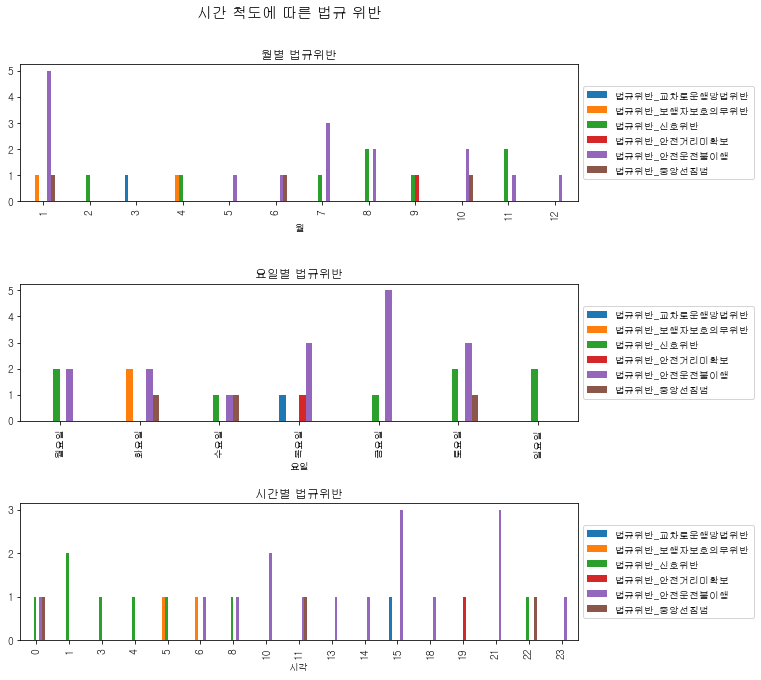

In [242]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('시간 척도에 따른 법규 위반', fontsize=15)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.6)

data_month.plot.bar(ax=ax[0])
ax[0].set_title('월별 법규위반')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

data_day.plot.bar(ax=ax[1])
ax[1].set_title('요일별 법규위반')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

data_time.plot.bar(ax=ax[2])
ax[2].set_title('시간별 법규위반')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()